**DA Mini Project**
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        - target: 사용자가 다음달에도 구독을 게속할지(1) 취소할지(0)

**1) 문제 정의 및 가설 설정하기 → 2) 데이터 분석 기본 세팅 하기 → 3) 데이터 분석하기 → 4) 분석 결과 시각화 하기 → 5) 최종 결론 내리기**

# 1) 문제 정의 및 가설 설정하기

## 문제 정의

- 유저들의 행동 패턴(학습 습관, 선호도, 이용 행태 등) 분석 → 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측

## 구독여정

1. 마음을 먹고 구독을 결제한다.
2. 어떤 학습 세션이 있는지 탐색하며 여러가지를 수강해본다.
    - 이 단계에서 중단 세션이 발생한다.
3. 마음에 드는 세션을 선택해 꾸준히 수강한다.
    - 이 단계에서 만족도가 올라게 된다.
    - 수강 과정에서 만족도에 영향을 미치는 요소가 무엇인지 파악해야 한다.

## 목표 및 가설
1) (목표1) 각 메타데이터 중 구독 연장 여부와 가장 연관 있는 것이 무엇인지 파악해보기
1) (가설1) 꾸준히 수강하는 사람일수록 구독 연장율이 높을 것이다.
2) (가설2) 구독 첫 한달 동안 완료하는 코스 수가 가장 많을 것이다. 

## 그 외 분석해볼 것
1) (분석1) 선호 난이도: 가장 선호하는 난이도 컨텐츠를 보강하면 구독률을 높일 수 있지 않을까?
2) (분석2) 선호 구독 종류

# 2) 데이터 분석 기본 세팅 하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import koreanize_matplotlib

In [6]:
user_data = pd.read_table('data/mini.csv',sep=',')
user_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [7]:
# 결측치 체크
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [8]:
user_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


# 3) 데이터 분석하기, 4) 시각화하기

## (목표1) 각 메타데이터 중 구독 연장 여부와 가장 연관 있는 것이 무엇인지 파악해보기
- 구독 연장 여부에 영향을 미치는 메타데이터는 ‘각 학습 세션에 소요된 평균 시간 (분)(average_time_per_learning_session)’이었다. 그외의 메타데이터는 구독 여부에 미치는 영향이 적었다.

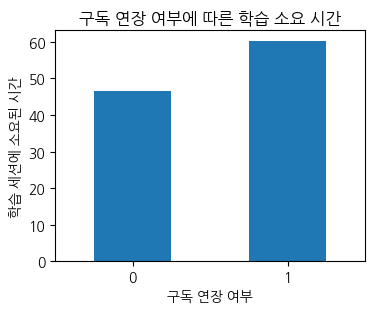

In [92]:
#average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
#0    46.456986 / 1    60.105533

타겟별_소요시간 = user_data.groupby('target')['average_time_per_learning_session'].sum()
총소요시간 = 타겟별_소요시간/타겟별_인원수
plt.figure(figsize=(4,3))
총소요시간.plot(kind='bar', rot=0)
plt.title("구독 연장 여부에 따른 학습 소요 시간")
plt.xlabel("구독 연장 여부")
plt.ylabel("학습 세션에 소요된 시간")
plt.show()

In [10]:
타겟별_인원수 = user_data.groupby('target')['user_id'].count()
타겟별_인원수
print(타겟별_인원수[0]) #다음달 구독 취소할 인원
print(타겟별_인원수[1]) #구독 연장할 인원

3801
6199


In [11]:
#subscription_duration: 사용자가 서비스에 가입한 기간 (월)

타겟별_가입기간 = user_data.groupby('target')['subscription_duration'].sum()
타겟별_가입기간

print(타겟별_가입기간/타겟별_인원수)

target
0    11.953959
1    11.862720
dtype: float64


In [12]:
#recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)

타겟별_최근로그인 = user_data.groupby('target')['recent_login_time'].sum()
타겟별_최근로그인/타겟별_인원수

target
0    15.057880
1    14.985804
dtype: float64

In [13]:
#average_login_time: 사용자의 일반적인 로그인 시간

타겟별_로그인시간 = user_data.groupby('target')['average_login_time'].sum()
타겟별_로그인시간/타겟별_인원수

target
0    15.026762
1    14.974035
dtype: float64

In [16]:
#monthly_active_learning_days: 월간 활동적인 학습 일수

타겟별_학습일수 = user_data.groupby('target')['monthly_active_learning_days'].sum()
타겟별_학습일수/타겟별_인원수

target
0    12.502236
1    12.571866
dtype: float64

In [17]:
#total_completed_courses: 완료한 총 코스 수
타겟별_완료코스 = user_data.groupby('target')['total_completed_courses'].sum()
타겟별_완료코스/타겟별_인원수

target
0    12.246251
1    12.216003
dtype: float64

In [18]:
#recent_learning_achievement: 최근 학습 성취도

타겟별_학습성취도 = user_data.groupby('target')['recent_learning_achievement'].sum()
타겟별_학습성취도/타겟별_인원수

target
0    75.000310
1    75.047419
dtype: float64

In [19]:
#abandoned_learning_sessions: 중단된 학습 세션 수

타겟별_중단세션수 = user_data.groupby('target')['abandoned_learning_sessions'].sum()
타겟별_중단세션수/타겟별_인원수

target
0    3.087609
1    3.016616
dtype: float64

In [20]:
#community_engagement_level: 커뮤니티 참여도
타겟별_커뮤니티참여도 = user_data.groupby('target')['community_engagement_level'].sum()
타겟별_커뮤니티참여도/타겟별_인원수

target
0    3.870560
1    3.895628
dtype: float64

In [21]:
타겟별_선호난이도0 = user_data[user_data['target'] == 0].groupby('preferred_difficulty_level').size()
print(타겟별_선호난이도0)

for i in 타겟별_선호난이도0:
    print(i/타겟별_인원수[0]*100)

preferred_difficulty_level
High       759
Low       1945
Medium    1097
dtype: int64
19.968429360694554
51.170744540910285
28.860826098395158


In [22]:
타겟별_선호난이도1 = user_data[user_data['target'] == 1].groupby('preferred_difficulty_level').size()
print(타겟별_선호난이도1)

for i in 타겟별_선호난이도1:
    print(i/타겟별_인원수[1]*100)

preferred_difficulty_level
High      1241
Low       3047
Medium    1911
dtype: int64
20.019357960961447
49.15308920793676
30.82755283110179


## 1) (가설1) 꾸준히 수강하는 사람일수록 구독 연장율이 높을 것이다.
- 수강패턴을 꾸준히 수강하는 사람과 몰아서 수강하는 사람으로 나눈다. 몰아서 수강하는 경우 주말에 수강하고 8일 이하로 방문한다고 가정한다.
- 분석 결과, 가설과 다르게 차이가 없음을 확인했다.

In [23]:
#꾸준히 수강: 6647명
꾸준_총인원 = user_data[user_data['monthly_active_learning_days'] > 8].count()['user_id']
꾸준_총인원

6647

In [24]:
#주말 수강: 3353명
주말_총인원 = user_data[user_data['monthly_active_learning_days'] <= 8].count()['user_id']
주말_총인원

3353

In [25]:
빈도수 = ['꾸준', '주말']
구독여부 = [0, 1]
빈도수_구독여부 = {}
for i in 빈도수:
    for j in 구독여부:
        if i == '꾸준':
            i_j = user_data[(user_data['target'] == j) & (user_data['monthly_active_learning_days'] > 8)].count()['user_id']
            빈도수_구독여부[i+str(j)] = i_j
        else:
            i_j = user_data[(user_data['target'] == j) & (user_data['monthly_active_learning_days'] <= 8)].count()['user_id']
            빈도수_구독여부[i+str(j)] = i_j
print(빈도수_구독여부)       

{'꾸준0': 2525, '꾸준1': 4122, '주말0': 1276, '주말1': 2077}


In [26]:
빈도수 = ['꾸준', '주말']
구독여부 = [0, 1]
빈도수_구독여부 = {'꾸준0': 2525, '꾸준1': 4122, '주말0': 1276, '주말1': 2077}
빈도수_구독여부_비율 = {}

for i in 빈도수:
    for j in 구독여부:
        if i == '꾸준':
            i_j = ((빈도수_구독여부[i+str(j)]/꾸준_총인원)*100).round(1)
            빈도수_구독여부_비율[i+str(j)] = i_j
        else:
            i_j = ((빈도수_구독여부[i+str(j)]/주말_총인원)*100).round(1)
            빈도수_구독여부_비율[i+str(j)] = i_j

빈도수_구독여부_비율

{'꾸준0': 38.0, '꾸준1': 62.0, '주말0': 38.1, '주말1': 61.9}

In [79]:
fruits = ['꾸준히 수강', '주말에 수강']
counts = [0.38, 0.381]
colors = ['tomato', 'red']

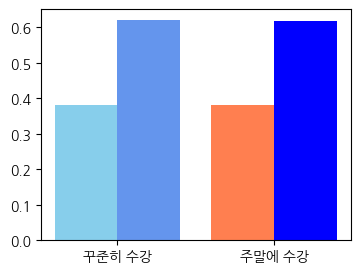

In [94]:
counts2 = [0.62, 0.619]
colors2 = ['cornflowerblue', 'blue']

idx = np.arange(len(counts))

width = 0.4
plt.figure(figsize=(4,3))

plt.bar(idx, counts, width, color=colors)
plt.bar(idx + width, counts2, width, color=colors2)

plt.xticks(idx + width / 2, fruits)
plt.show()

## 2) (가설2) 구독 첫 한달 동안 완료하는 코스 수가 가장 많을 것이다.
- 구독 첫 달에는 가장 열정적으로 수강하여 완료하는 코스가 가장 많은 이용 행태를 보일 것으로 예상했다.
- 분석 결과 전체 평균 수강 완료 코스는 2개였다. 반면 개월수로 분석 시 첫 달이 12.3개로 가장 많고, 이후 급격히 감소하는 것을 알 수 있었다.

In [30]:
#한달 평균 완료 코스 수 : 2개
(user_data['평균코스수'].sum()/10000).round(2)

2.0

In [27]:
user_data['평균코스수'] = user_data['total_completed_courses']/ user_data["subscription_duration"]

In [28]:
user_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,평균코스수
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,1.230769
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,0.812500
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,0.636364
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,18.000000
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,2.500000


In [48]:
# 10개월 기준: 첫달이 가장 높고 점차 줄어듦
for i in range(1, 11):
    구독i개월_인원 = user_data[user_data['subscription_duration']==i].count()['user_id']
    구독i개월_총코스수 = user_data[user_data['subscription_duration']==i].sum()['평균코스수']
    구독i개월_평균코스수 = (구독i개월_총코스수/i/구독i개월_인원).round(1)
    개월별_코스수[i]=구독i개월_평균코스수

개월별_코스수

{1: 12.3,
 2: 3.0,
 3: 1.4,
 4: 0.8,
 5: 0.5,
 6: 0.3,
 7: 0.3,
 8: 0.2,
 9: 0.2,
 10: 0.1}

In [59]:
개월별_코스수.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

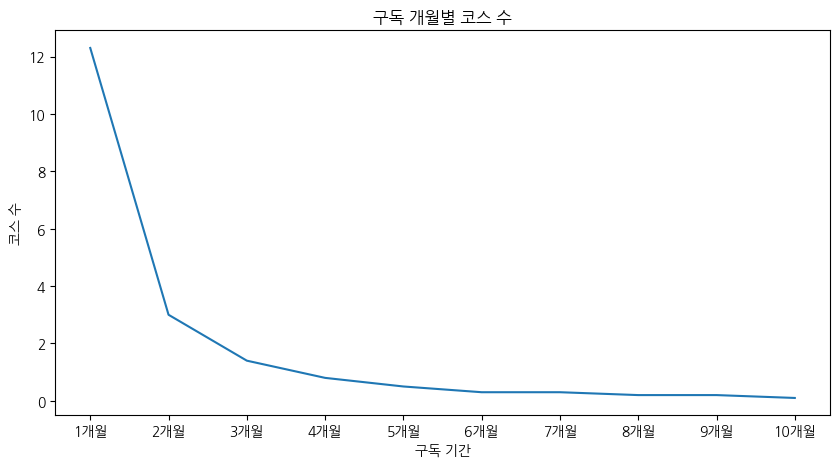

In [63]:
x = list(개월별_코스수.keys())
y = list(개월별_코스수.values())

plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [f"{i}개월" for i in x])
plt.xlabel("구독 기간")
plt.ylabel("코스 수")
plt.title("구독 개월별 코스 수")
plt.show()

## 1) (분석1) 선호 난이도: 가장 선호하는 난이도 컨텐츠를 보강하면 구독률을 높일 수 있지 않을까?
- 분석 결과 Low > Medium > High 임을 알 수 있었다.
- 선호 난이도가 구독 연장 여부에 영향을 미치는지 분석해보았지만 큰 상관관계가 없었다.

In [81]:
#전체
선호난이도 = user_data.groupby('preferred_difficulty_level')['user_id'].count()
선호난이도

preferred_difficulty_level
High      2000
Low       4992
Medium    3008
Name: user_id, dtype: int64

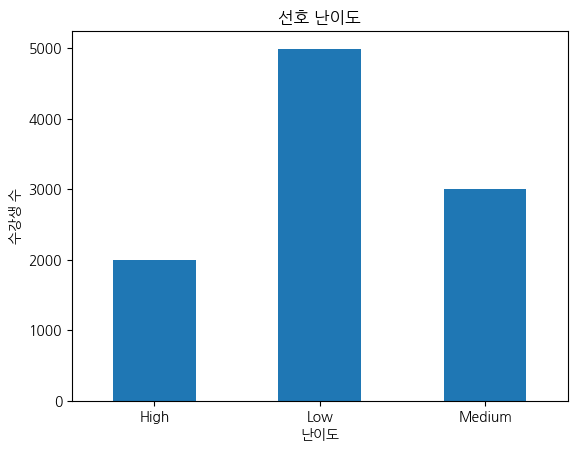

In [82]:
선호난이도.plot(kind='bar', rot=0)
plt.title("선호 난이도")
plt.xlabel("난이도")
plt.ylabel("수강생 수")
plt.show()

In [33]:
#타겟=0
타겟별_선호난이도0 = user_data[user_data['target'] == 0].groupby('preferred_difficulty_level').size()
print(타겟별_선호난이도0)

for i in 타겟별_선호난이도0:
    print(i/타겟별_인원수[0]*100)

preferred_difficulty_level
High       759
Low       1945
Medium    1097
dtype: int64
19.968429360694554
51.170744540910285
28.860826098395158


In [67]:
#타겟=1
타겟별_선호난이도1 = user_data[user_data['target'] == 1].groupby('preferred_difficulty_level').size()
print(타겟별_선호난이도1)

for i in 타겟별_선호난이도1:
    print(i/타겟별_인원수[1]*100)

preferred_difficulty_level
High      1241
Low       3047
Medium    1911
dtype: int64
20.019357960961447
49.15308920793676
30.82755283110179


## 2) (분석2) 선호 구독 종류
- 분석 결과 Basic > Premium 인 것을 알 수 있었다.
- 선호 구독 종류와 선호 난이도의 상관관계를 파악해보았으나 관계가 없었다.

In [35]:
구독 = user_data.groupby('subscription_type')['user_id'].count()
구독

subscription_type
Basic      5979
Premium    4021
Name: user_id, dtype: int64

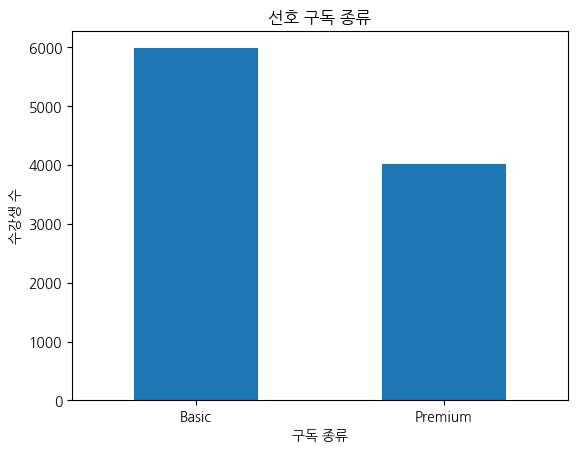

In [83]:
구독.plot(kind='bar', rot=0)
plt.title("선호 구독 종류")
plt.xlabel("구독 종류")
plt.ylabel("수강생 수")
plt.show()

In [36]:
선호단계 = ['Low', 'Medium', 'High']
구독종류 = ['Basic', 'Premium']
선호단계_구독종류 = {}
for i in 구독종류:
    for j in 선호단계:
        i_j = user_data[(user_data['subscription_type']==i) & (user_data['preferred_difficulty_level']==j)]['user_id'].count()
        선호단계_구독종류[i+str(j)] = i_j
선호단계_구독종류

{'BasicLow': 3009,
 'BasicMedium': 1742,
 'BasicHigh': 1228,
 'PremiumLow': 1983,
 'PremiumMedium': 1266,
 'PremiumHigh': 772}

In [37]:
Basic_선호단계_구독종류 = {'BasicLow': 3009, 'BasicMedium': 1742, 'BasicHigh': 1228}
Basic_선호단계_구독종류_비율 = {}
Basic_총인원 = 5979

for i in Basic_선호단계_구독종류:
    비율 = (Basic_선호단계_구독종류[i]/Basic_총인원*100)
    Basic_선호단계_구독종류_비율[i] = 비율

Basic_선호단계_구독종류_비율

{'BasicLow': 50.326141495233315,
 'BasicMedium': 29.135306907509616,
 'BasicHigh': 20.538551597257065}

In [38]:
Premium_선호단계_구독종류 = {'PremiumLow': 1983, 'PremiumMedium': 1266, 'PremiumHigh': 772}
Premium_선호단계_구독종류_비율 = {}
Premium_총인원 = 4021

for i in Premium_선호단계_구독종류:
    비율 = (Premium_선호단계_구독종류[i]/Premium_총인원*100)
    Premium_선호단계_구독종류_비율[i] = 비율

Premium_선호단계_구독종류_비율

{'PremiumLow': 49.316090524745086,
 'PremiumMedium': 31.484705297189752,
 'PremiumHigh': 19.19920417806516}

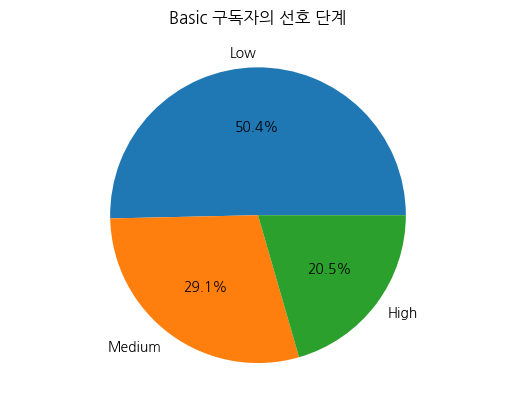

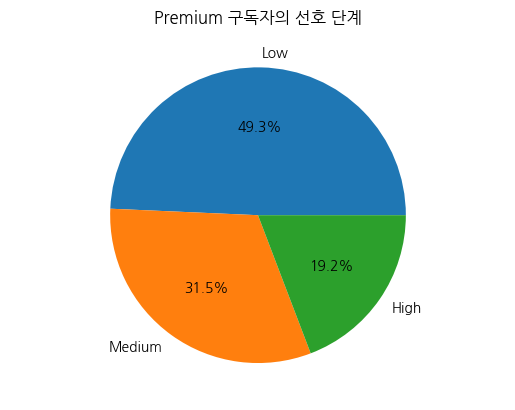

In [89]:
plt.axis('equal')
plt.title('Basic 구독자의 선호 단계')
ratio = [0.503, 0.291, 0.205]
grade = ['Low', 'Medium', 'High']
plt.pie(ratio, labels=grade, autopct='%.1f%%')
colors = ['skyblue', 'coral', 'tomato']

plt.show()

plt.axis('equal')
plt.title('Premium 구독자의 선호 단계')
ratio = [0.493, 0.315, 0.192]
grade = ['Low', 'Medium', 'High']
plt.pie(ratio, labels=grade, autopct='%.1f%%')
colors = ['skyblue', 'coral', 'tomato']

plt.show()

# 5) 최종 결론 내리기
## 분석 결과 요약
1. (목표1) 각 메타데이터 중 구독 연장 여부와 가장 연관 있는 것이 무엇인지 파악해보기
    - 구독 연장 여부에 영향을 미치는 메타데이터는 ‘각 학습 세션에 소요된 평균 시간 (분)(average_time_per_learning_session)’이었다. 그외의 메타데이터는 구독 여부와 큰 상관관계가 없었다.
2. (가설1) 꾸준히 수강하는 사람일수록 구독 연장율이 높을 것이다.
    - 주말 등 몰아서 수강하는 수강생보다 꾸준히 수강한 수강생이 구독 연장율이 높을 것이라고 가설을 세웠지만, 실제 데이터에서는 큰 차이가 없었다.
3. (가설2) 구독 첫 한달 동안 완료하는 코스 수가 가장 많을 것이다.
    - 구독 첫 달에는 가장 열정적으로 수강하여 완료하는 코스가 가장 많은 이용 행태를 보일 것으로 예상했다. 분석 결과 전체 평균 수강 완료 코스는 2개인 반면 개월수로 분석 시 첫 달이 12.3개로 가장 많고, 이후 급격히 감소하는 것을 알 수 있었다.
4. (분석1) 선호 난이도: 가장 선호하는 난이도 컨텐츠를 보강하면 구독률을 높일 수 있지 않을까?
    - 분석 결과 Low > Medium > High 임을 알 수 있었다.
    - 선호 난이도가 구독 연장 여부에 영향을 미치는지 분석해보았지만 큰 상관관계가 없었다.
5. (분석2) 선호 구독 종류
    - 분석 결과 Basic > Premium 인 것을 알 수 있었다.
    - 선호 구독 종류와 선호 난이도의 상관관계를 파악해보았으나 관계가 없었다.

## 최종 결론
구독 연장 여부에 영향을 미치는 메타데이터는 ‘각 학습 세션에 소요된 평균 시간 (분)(average_time_per_learning_session)’이었다. 구독 연장을 결정한 수강생은 평균 60시간의 세션을 수강한 반면, 구독 취소를 결정한 수강생은 평균 47시간을 수강했다. 그외의 메타데이터는 구독 여부와 큰 상관관계가 없었다.
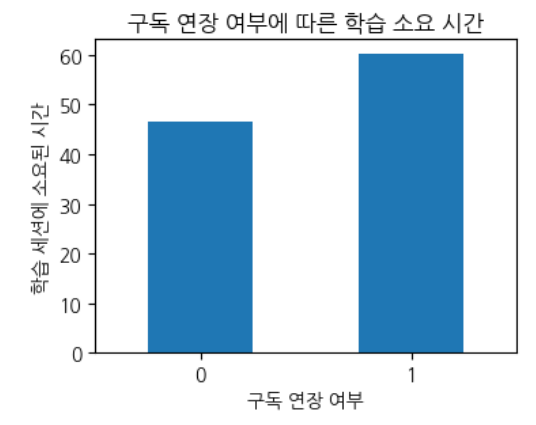
월간 활동적인 학습 일수(monthly_active_learning_days)’를 구체화하여 주말 등 몰아서 수강하는 수강생보다 꾸준히 수강한 수강생이 구독 연장율이 높을 것이라고 가설을 세웠지만, 실제 데이터에서는 큰 차이가 없었다.
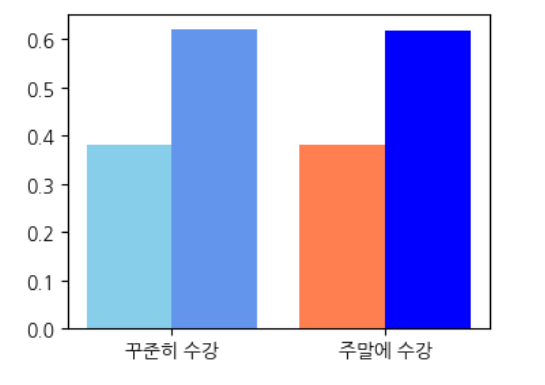
구독 첫 달에는 가장 열정적으로 수강하여 완료하는 코스가 가장 많은 이용 행태를 보일 것으로 예상했다. 분석 결과 전체 평균 수강 완료 코스는 2개인 반면 개월수로 분석 시 첫 달이 12.3개로 가장 많고, 두번째 달에는 3개로 급격히 감소하는 것을 알 수 있었다.
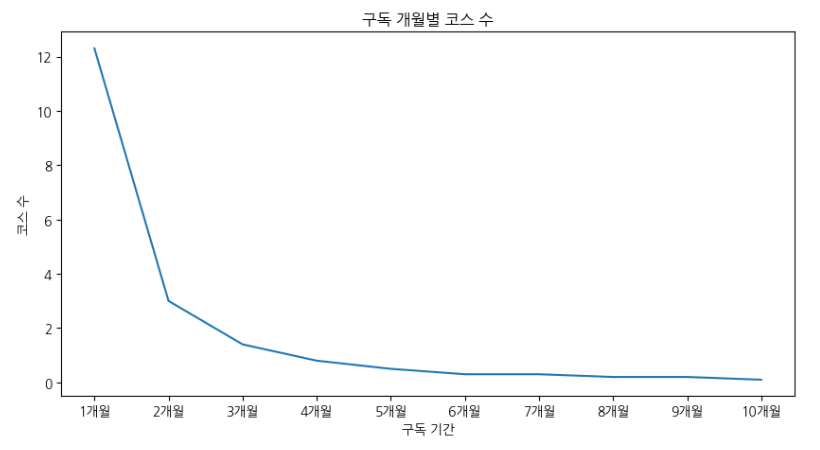
수강생이 선호하는 난이도는 Low > Medium > High 순이었으며, 선호하는 구독 종류는 Basic > Premium 순이었다.
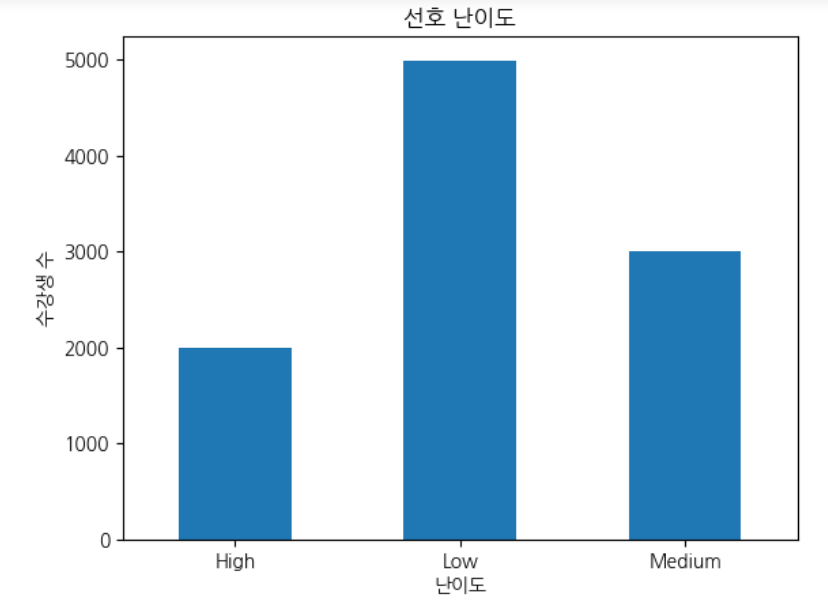, 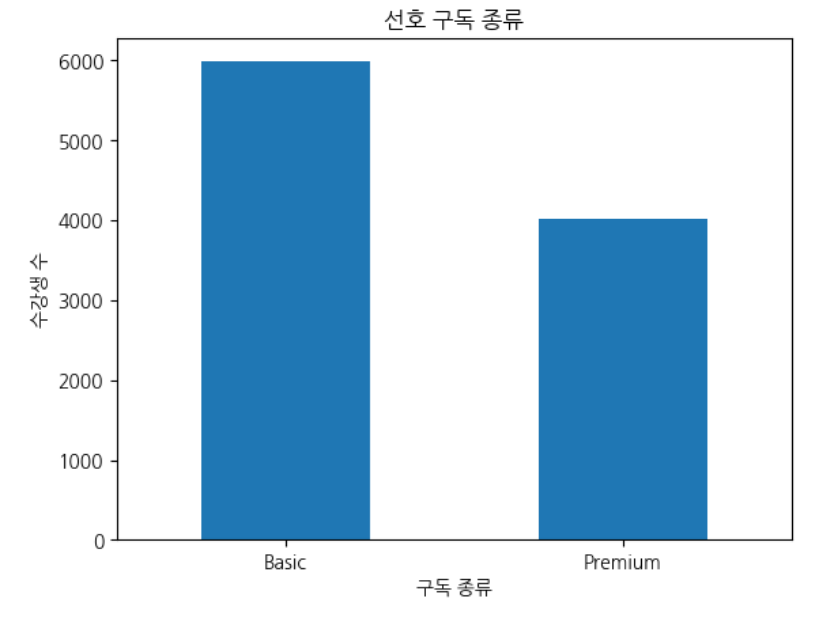
첫 달에 수강 완료하는 코스 수가 많기 때문에, 양질의 Low 단계 콘텐츠를 통해 온보딩을 강화하여 구독 연장률에 영향을 미칠 수 있을 것이다.